In [1]:
from spectacle.core.spectra import Spectrum1D
from spectacle.modeling.models import Absorption1D
from spectacle.process.lsf import LSF
from spectacle.core.lines import Line


import numpy as np

INFO:root:Added misty to custom loaders.
INFO:root:Added my-format to custom loaders.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]

# Equivalent Width Analysis
This is an overplot of the Balmer and Lyman absorption lines.

## Balmer Series

<IPython.core.display.Javascript object>


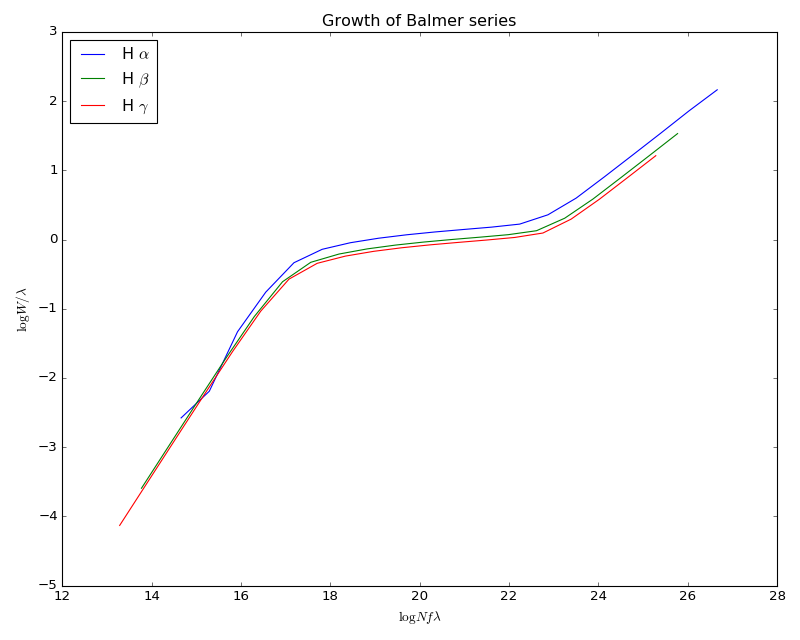

/Users/nearl/projects/spectacle/spectacle/core/profiles.py:69: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)
/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with 

In [3]:
f, ax = plt.subplots(1, 1)

for lam, f, name in [(6.5646230e+02, 6.9580000e-01, r"H $\alpha$"), 
                     (4.8626880e+02, 1.2180000e-01, r"H $\beta$"), 
                     (4.3416900e+02, 4.4370000e-02, r"H $\gamma$")]:
    log_n, log_w = [], []
    
    for n in np.logspace(12, 24, 20):
        # Create spectrum
        line = Line(name=name, lambda_0=lam, f_value=f, v_doppler=1e7, column_density=n)
        spectrum_model = Absorption1D(lines=[line])
        
        dispersion = np.linspace(0, 1000, 20000)
        spectrum = spectrum_model(dispersion)

        # Append values to lists
        log_n.append(np.log10(n * f * (lam)))
        
        ew, ew_uncert = spectrum.equivalent_width(x_0=lam)
        log_w.append(np.log10(ew))
    
    ax.plot(log_n, log_w, label=name)
    ax.set_title("Growth of Balmer series")
    
ax.set_xlabel("$\log N f \lambda$")
ax.set_ylabel("$\log W / \lambda$")

# plt.plot(spectrum1.dispersion, spectrum1.flux)
plt.legend(loc=0)
plt.tight_layout()
plt.show()

## Lyman series

<IPython.core.display.Javascript object>


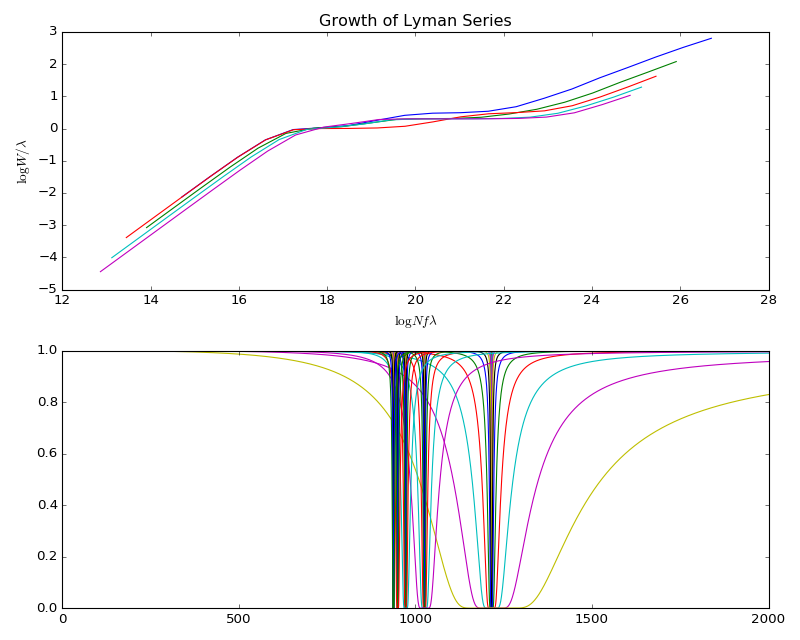

/Users/nearl/projects/spectacle/spectacle/core/profiles.py:69: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with size 0
ERROR:root:index 0 is out of bounds for axis 0 with

In [5]:
f, (ax1, ax2) = plt.subplots(2, 1)

for lam, f, name in [(1.2156701e+03, 4.1640000e-01, r"L $\alpha$"), 
                     (1.0257223e+03, 7.9120000e-02, r"L $\beta$"), 
                     (9.7253680e+02, 2.9000000e-02, r"L $\gamma$"),
                     (9.4974310e+02, 1.3940000e-02, r"L $\delta$"),
                     (9.3780350e+02, 7.7990000e-03, r"L $\epsilon$")]:
    log_n, log_w = [], []
    
    for n in np.logspace(12, 24, 20):
        # Create spectrum
        line = Line(name=name, lambda_0=lam, f_value=f, v_doppler=1e7, column_density=n)
        spectrum_model = Absorption1D(lines=[line])
        
        dispersion = np.linspace(0, 2000, 2000)
        spectrum = spectrum_model(dispersion)

        # Append values to lists
        log_n.append(np.log10(n * f * (lam)))
        ew, ew_uncert = spectrum.equivalent_width(x_0=lam)

        log_w.append(np.log10(ew))
        
        ax2.plot(spectrum.dispersion, spectrum.data)
    
    ax1.plot(log_n, log_w, label=name)
    ax1.set_title("Growth of Lyman Series")
    
ax1.set_xlabel("$\log N f \lambda$")
ax1.set_ylabel("$\log W / \lambda$")

# plt.plot(spectrum1.dispersion, spectrum1.flux)
ax2.legend(loc=0)
plt.tight_layout()
plt.show()